# Time Series Analysis of Daily Electricity Consumption

#### Focus:
#### Basic time series handling using pandas
#### Convert to datetime, set datetime index
#### Perform resampling and slicing
#### Objective:
#### Analyze electricity consumption patterns over time using datetime-aware methods. Focus on resampling (daily, weekly, monthly), and slicing time ranges.
#### Skills Practiced:
#### pd.to_datetime() conversion
#### Setting datetime index
#### Time-based slicing (df.loc['2020-01'], etc.)
#### Resampling (resample('M'), resample('W'))
#### Plotting simple trends

In [2]:
import pandas as pd
import numpy as np

In [1]:
import pandas as pd

path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_liyan\data\Time.csv"

df = pd.read_csv(path)

print(df.head())


         Date        Time  Global_active_power  Global_reactive_power  \
0  16/12/2006  5:24:00 PM                4.216                  0.418   
1  16/12/2006  5:25:00 PM                5.360                  0.436   
2  16/12/2006  5:26:00 PM                5.374                  0.498   
3  16/12/2006  5:27:00 PM                5.388                  0.502   
4  16/12/2006  5:28:00 PM                3.666                  0.528   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0   234.84              18.4             0.0             1.0            17.0  
1   233.63              23.0             0.0             1.0            16.0  
2   233.29              23.0             0.0             2.0            17.0  
3   233.74              23.0             0.0             1.0            17.0  
4   235.68              15.8             0.0             1.0            17.0  


In [18]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1044506 non-null  float64
 6   Sub_metering_1         1044506 non-null  float64
 7   Sub_metering_2         1044506 non-null  float64
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7), object(2)
memory usage: 72.0+ MB


# Converting to datetime

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

C:\Users\bbuser\AppData\Local\Temp\ipykernel_3640\1793818658.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


0         2006-12-16
1         2006-12-16
2         2006-12-16
3         2006-12-16
4         2006-12-16
             ...    
1048570   2008-12-13
1048571   2008-12-13
1048572   2008-12-13
1048573   2008-12-13
1048574   2008-12-13
Name: Date, Length: 1048575, dtype: datetime64[ns]

# Setting up a datetime 

In [21]:
df = df.set_index('Date')
print(df.head())
print(df.index)

                  Time  Global_active_power  Global_reactive_power  Voltage  \
Date                                                                          
2006-12-16  5:24:00 PM                4.216                  0.418   234.84   
2006-12-16  5:25:00 PM                5.360                  0.436   233.63   
2006-12-16  5:26:00 PM                5.374                  0.498   233.29   
2006-12-16  5:27:00 PM                5.388                  0.502   233.74   
2006-12-16  5:28:00 PM                3.666                  0.528   235.68   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Date                                                                          
2006-12-16              18.4             0.0             1.0            17.0  
2006-12-16              23.0             0.0             1.0            16.0  
2006-12-16              23.0             0.0             2.0            17.0  
2006-12-16              23.0             0.0       

# Slicing 

In [25]:
dates = pd.date_range(start='2007-12-12', periods=10, freq='D')
values = np.random.randint(10, 30, size =10)
df= pd.DataFrame({'Value': values}, index=dates)
df

,Value
2007-12-12,10
2007-12-13,17
2007-12-14,28
2007-12-15,16
2007-12-16,18
2007-12-17,10
2007-12-18,14
2007-12-19,14
2007-12-20,18
2007-12-21,13


# Slicing by month

In [30]:
df.loc[('2007-12')]

,Value
2007-12-12,10
2007-12-13,17
2007-12-14,28
2007-12-15,16
2007-12-16,18
2007-12-17,10
2007-12-18,14
2007-12-19,14
2007-12-20,18
2007-12-21,13


# Slicing by year 

In [33]:
df.loc[('2007')]

,Value
2007-12-12,10
2007-12-13,17
2007-12-14,28
2007-12-15,16
2007-12-16,18
2007-12-17,10
2007-12-18,14
2007-12-19,14
2007-12-20,18
2007-12-21,13


# Resampling 

In [34]:
df_monthley_mean = df.resample('M').mean()
df_monthley_mean

C:\Users\bbuser\AppData\Local\Temp\ipykernel_3640\2522980246.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthley_mean = df.resample('M').mean()


,Value
2007-12-31,15.8


<function matplotlib.pyplot.show(close=None, block=None)>

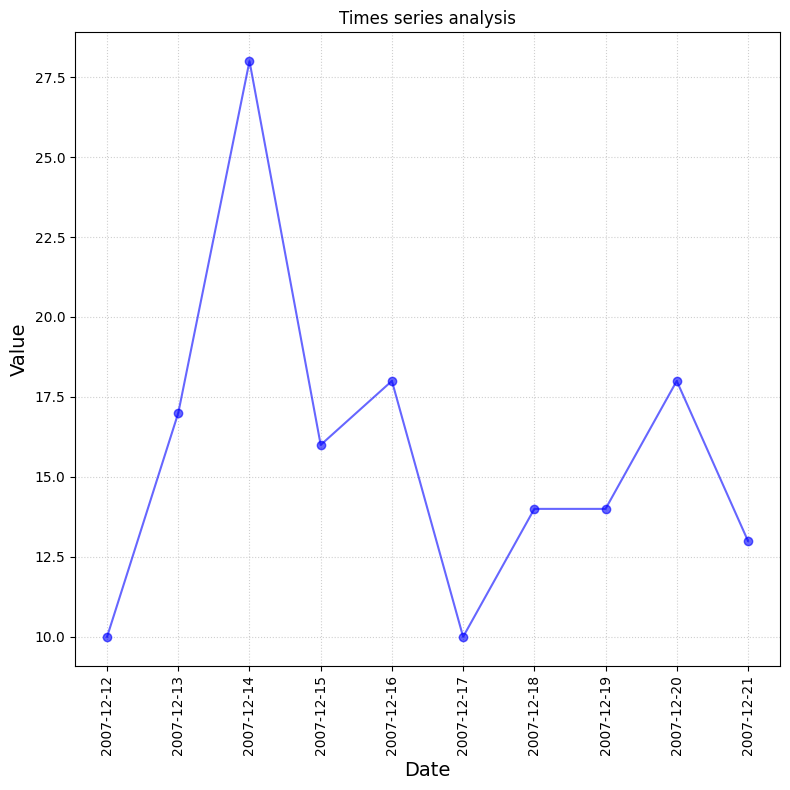

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(df.index, df['Value'], marker = 'o', linestyle='-', color='blue', alpha=0.6)
plt.title('Times series analysis')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True, linestyle = ':', alpha=0.6)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show